In [7]:
import bk.load
import bk.compute
import bk.plot

import numpy as np

import basefunction.assembly

import neuroseries as nts

import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def angles_vectors(a,b):
    dot = np.dot(a,b)
    norms = np.linalg.norm(a)*np.linalg.norm(b)

    cos = dot/norms
    rad = np.arccos(cos)
    deg = np.rad2deg(rad)

    return deg

In [136]:
bk.load.current_session_linux()
neurons, metadata = bk.load.spikes()
states = bk.load.states()

neurons_hpc = neurons[metadata.Region == 'Hpc']

t, actmat = bk.compute.binSpikes(neurons_hpc,binSize=0.025)
actmat = nts.TsdFrame(t,actmat.T,time_units='s')

run = bk.load.run_intervals()
actmat_run = actmat.restrict(run)
actmat_sws = actmat.restrict(states['sws'])

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


In [137]:
patterns,sig,zact = basefunction.assembly.runPatterns(actmat_run.values.T.astype(float),method = 'ica',nullhyp = 'mp')
zact_sws = scipy.stats.zscore(actmat_sws.values,0)
assemblies_activities = basefunction.assembly.computeAssemblyActivity(patterns,zact_sws.T)

In [138]:
zact_sws = nts.TsdFrame(actmat_sws.times(),zact_sws)
assemblies_activities = nts.TsdFrame(actmat_sws.times(),np.array(assemblies_activities).T)
members = np.abs(patterns[0])>0.15


In [141]:
%matplotlib notebook
peak = 12639

mid = int(assemblies_activities.as_units('s').index[peak])
start = mid-1
end = mid+1

fig,ax = plt.subplots(2,1,sharex=True,figsize = (16,8))
plt.sca(ax[0])
plt.plot(assemblies_activities.iloc[peak-100:peak+100].as_units('s')/10)
bk.plot.rasterPlot(neurons[metadata.Region == 'Hpc'][~members],[start,end],col = 'black')
bk.plot.rasterPlot(neurons[metadata.Region == 'Hpc'][members],[start,end],col = 'red')


plt.sca(ax[1])
plt.plot(lfp.as_units('s'))
for i in rip['peak'].as_units('s').index.values:
    if (i<end) and (i>start):
        plt.axvline(i,color = 'red')
lfp = bk.load.lfp(13,start,end)

In [123]:
rip = bk.load.ripples()

In [129]:
for i in rip['peak'].as_units('s'):
    print(i)
    if (i<end) and (i>start):
        plt.axvline(i,col = 'red')

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [125]:
rip['peak']

TypeError: pandas.core.series.Series.__init__() got multiple values for keyword argument 'index'

In [22]:
zact_sws.as_units('s')

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Time (s),,,,,,,,,,,,,,,,,,,,,
1448.0125,-0.105789,-0.152862,-0.125804,-0.158662,-0.243589,-0.126182,-0.040261,-0.071706,-0.145226,-0.153072,...,-0.036657,-0.039771,-0.111751,-0.175597,-0.119674,-0.082774,-0.062712,-0.246437,-0.124009,-0.133948
1448.0375,-0.105789,-0.152862,-0.125804,4.486281,-0.243589,-0.126182,-0.040261,8.512743,-0.145226,-0.153072,...,-0.036657,-0.039771,-0.111751,-0.175597,-0.119674,-0.082774,-0.062712,-0.246437,-0.124009,-0.133948
1448.0625,-0.105789,-0.152862,-0.125804,-0.158662,-0.243589,-0.126182,-0.040261,-0.071706,-0.145226,-0.153072,...,-0.036657,-0.039771,-0.111751,3.487934,-0.119674,-0.082774,-0.062712,-0.246437,-0.124009,-0.133948
1448.0875,-0.105789,-0.152862,-0.125804,-0.158662,-0.243589,-0.126182,-0.040261,-0.071706,-0.145226,-0.153072,...,-0.036657,-0.039771,-0.111751,-0.175597,-0.119674,-0.082774,-0.062712,-0.246437,-0.124009,-0.133948
1448.1125,-0.105789,-0.152862,-0.125804,-0.158662,-0.243589,-0.126182,-0.040261,-0.071706,-0.145226,-0.153072,...,-0.036657,-0.039771,-0.111751,-0.175597,-0.119674,-0.082774,-0.062712,-0.246437,-0.124009,-0.133948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21849.8875,-0.105789,-0.152862,-0.125804,-0.158662,-0.243589,-0.126182,-0.040261,-0.071706,-0.145226,-0.153072,...,-0.036657,-0.039771,-0.111751,-0.175597,-0.119674,-0.082774,-0.062712,-0.246437,-0.124009,-0.133948
21849.9125,-0.105789,-0.152862,-0.125804,-0.158662,-0.243589,6.280469,-0.040261,-0.071706,-0.145226,-0.153072,...,-0.036657,-0.039771,-0.111751,-0.175597,-0.119674,-0.082774,-0.062712,-0.246437,-0.124009,-0.133948
21849.9375,-0.105789,-0.152862,-0.125804,-0.158662,-0.243589,-0.126182,-0.040261,-0.071706,-0.145226,-0.153072,...,-0.036657,-0.039771,-0.111751,-0.175597,-0.119674,-0.082774,-0.062712,-0.246437,-0.124009,-0.133948


(array([ 9, 10, 11, 14, 17, 23, 54]),)


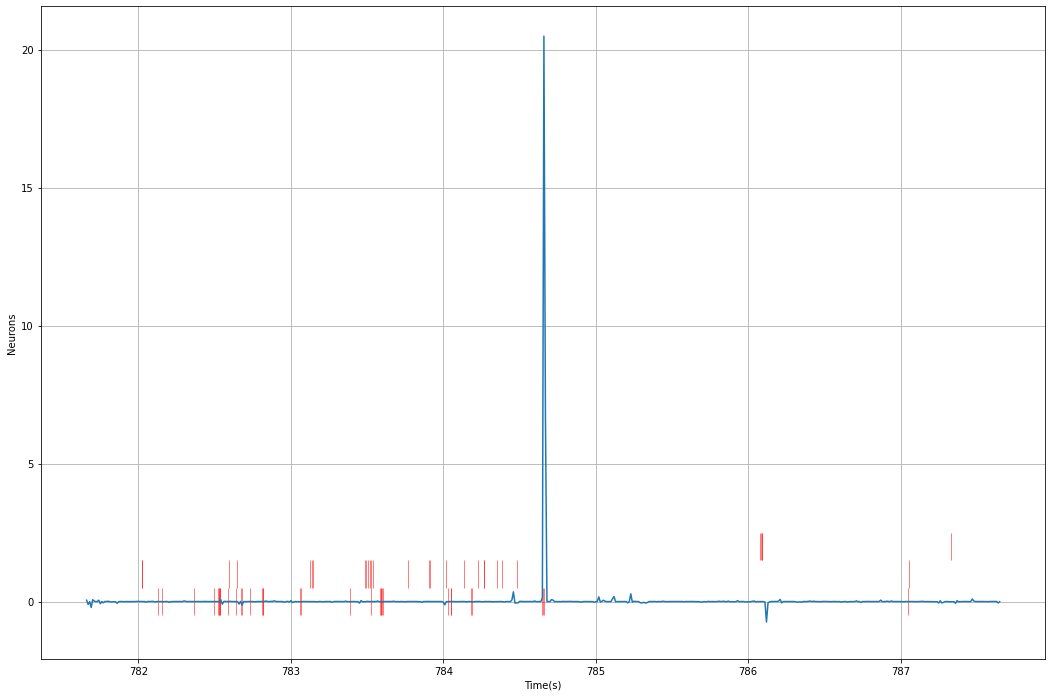

(array([ 9, 20, 24, 25, 28, 29, 31, 41]),)


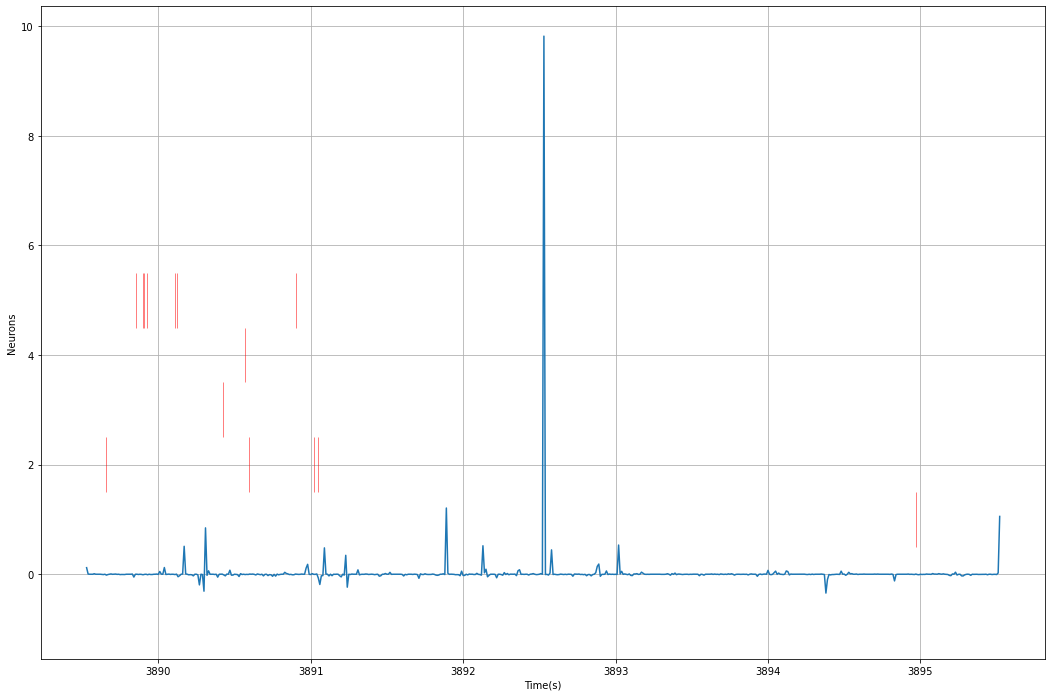

(array([ 5, 26, 45, 47, 48, 57, 59]),)


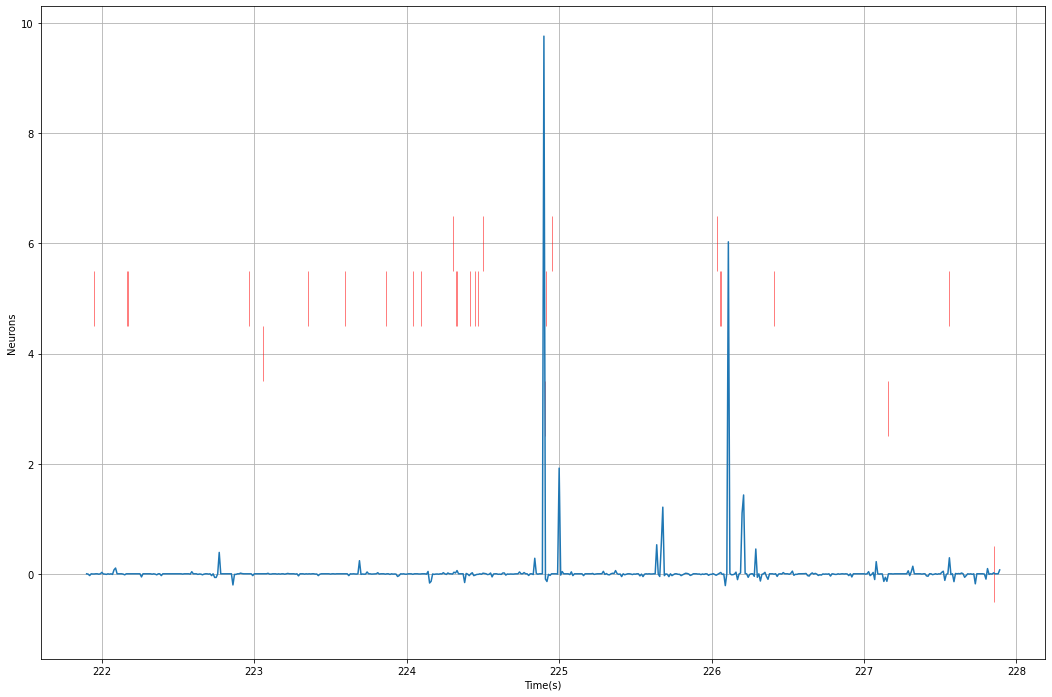

(array([ 1, 14, 15, 16, 21, 30, 32, 34]),)


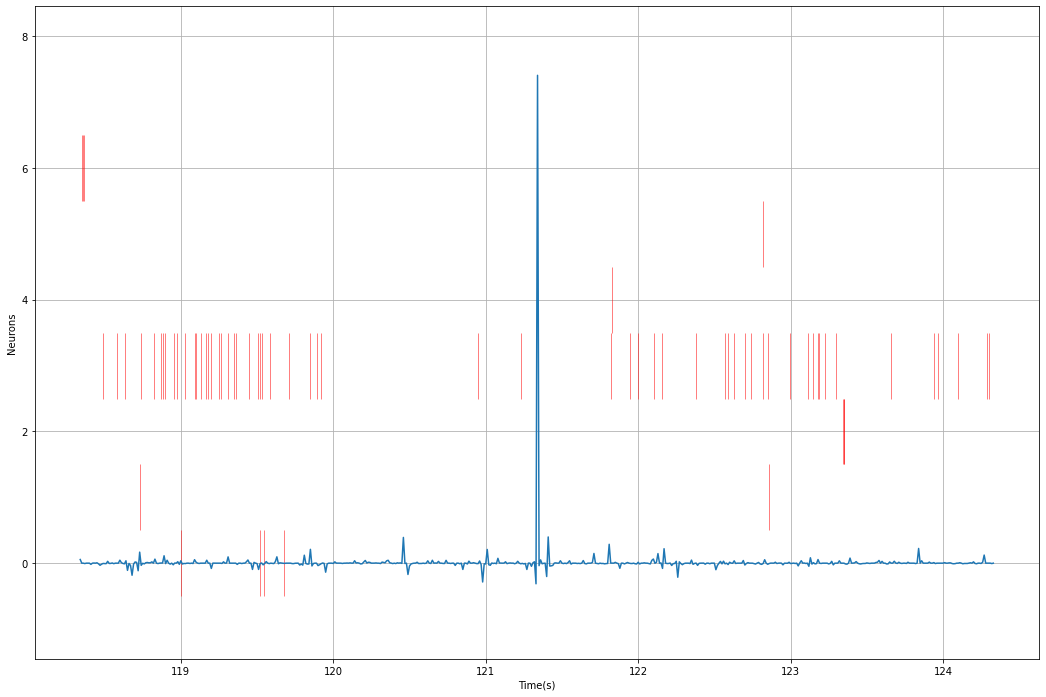

(array([ 8, 10, 12, 15, 16, 18, 33]),)


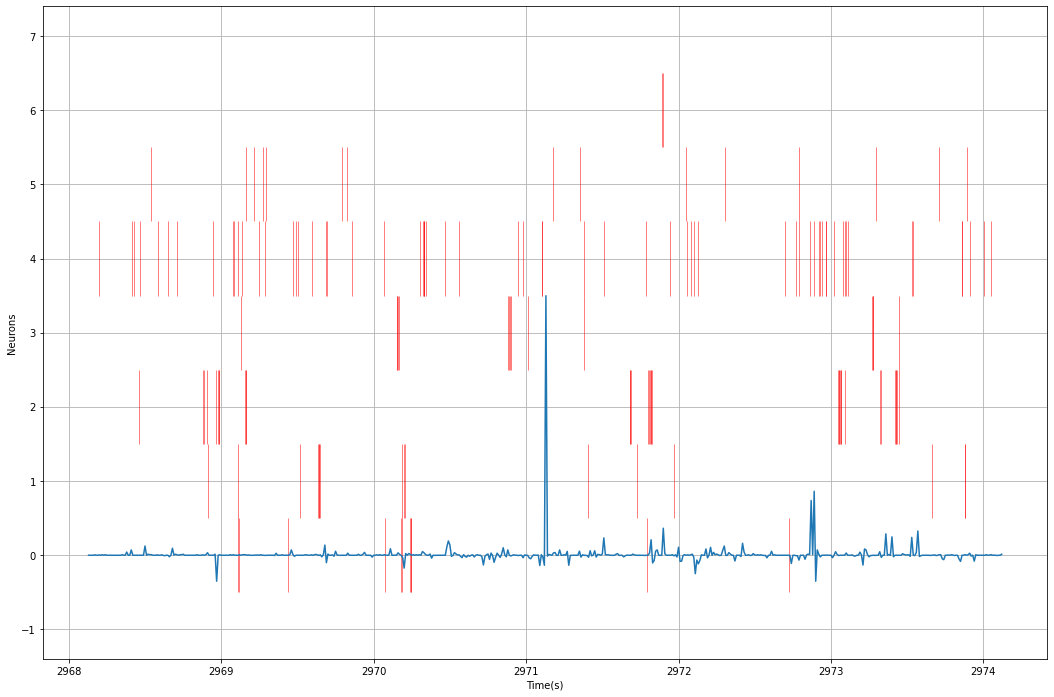

(array([ 3,  6,  7,  8, 13, 14, 43, 48, 58]),)


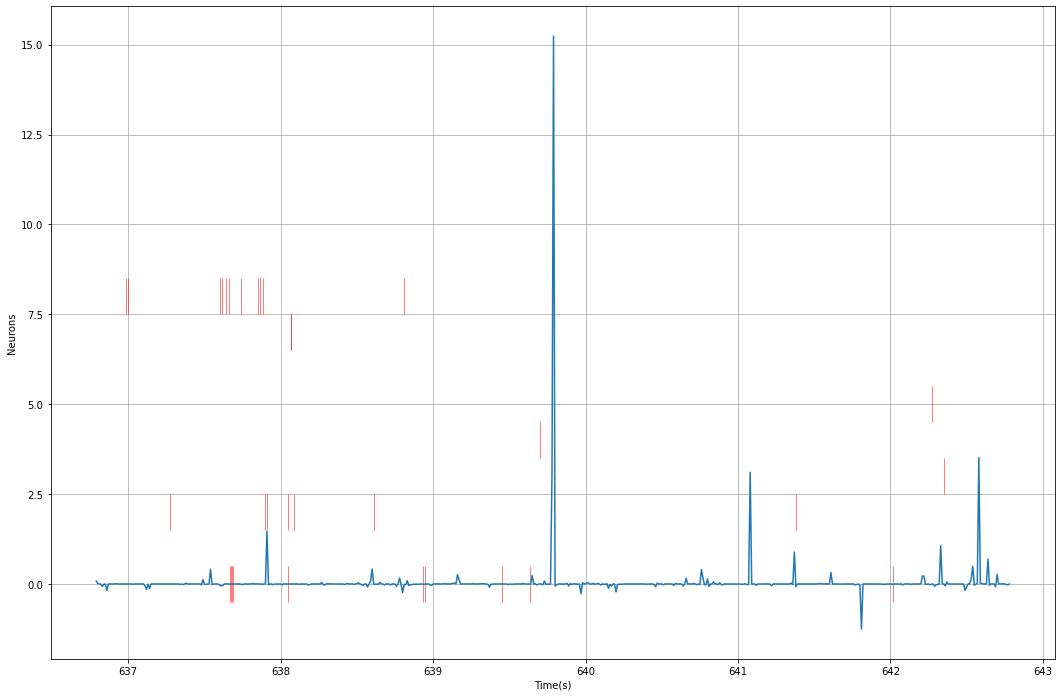

(array([ 2,  4,  7,  8, 10, 18]),)


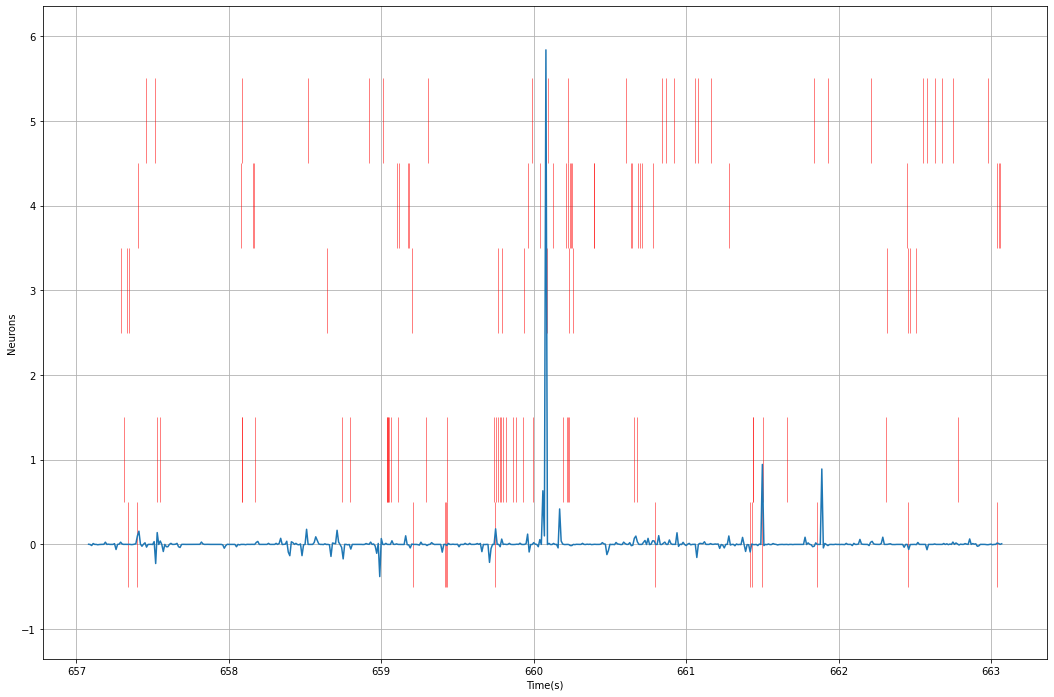

(array([ 7, 19, 20, 22, 26, 29, 33, 34, 36, 38, 40, 41, 43, 50, 53, 56]),)


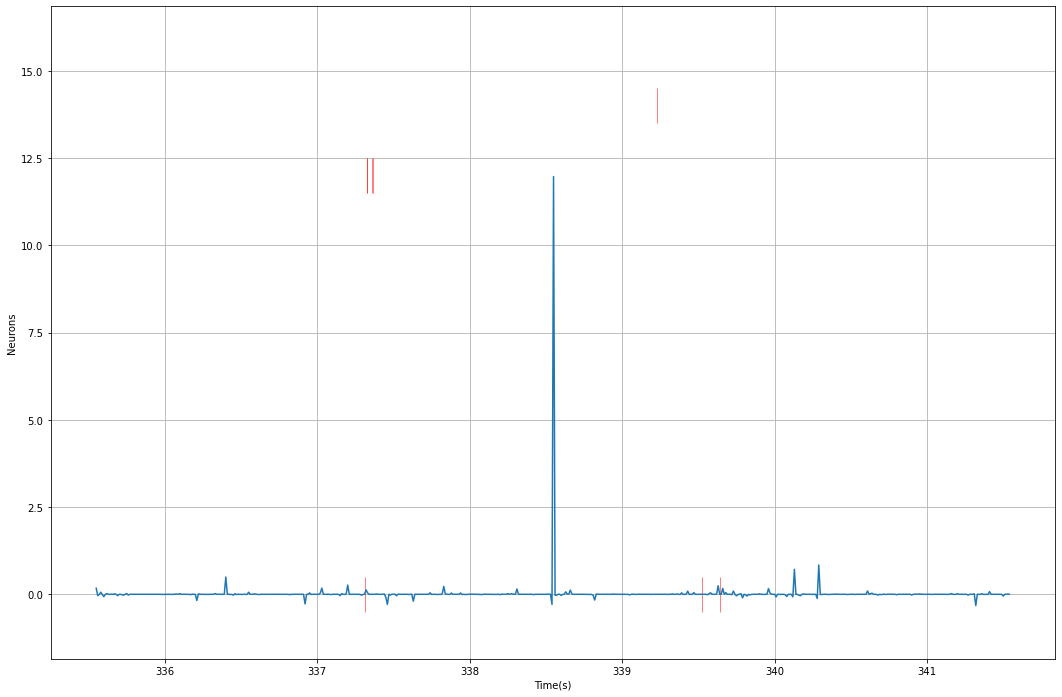

(array([ 0,  5, 33, 46, 48, 49, 53, 55, 58]),)


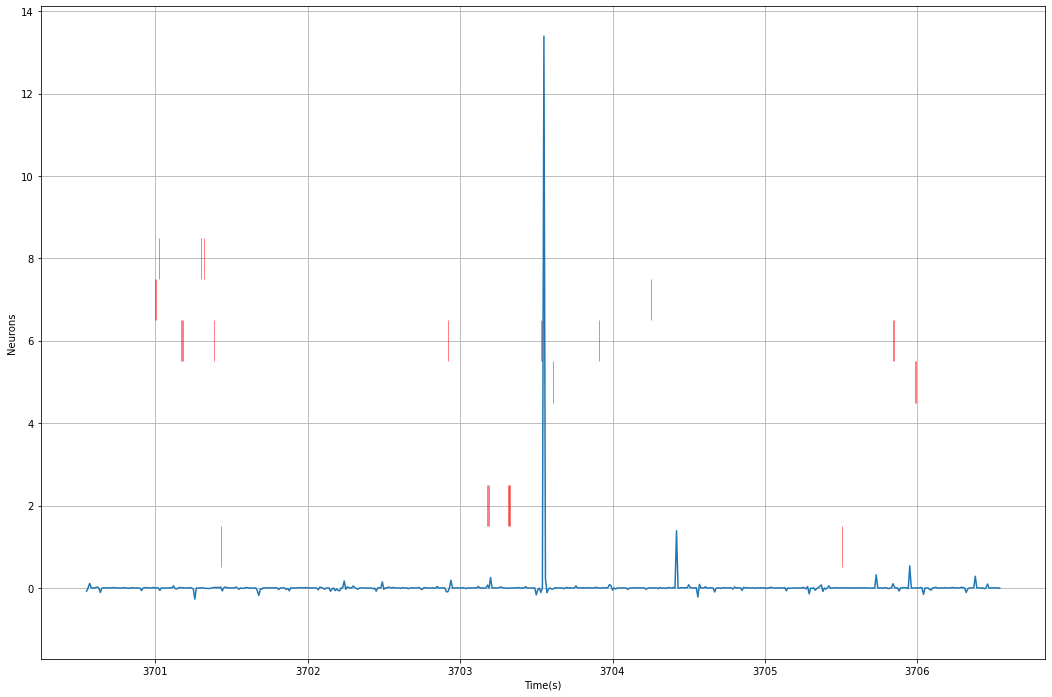

(array([ 5,  7, 12, 20, 49, 50, 52, 59]),)


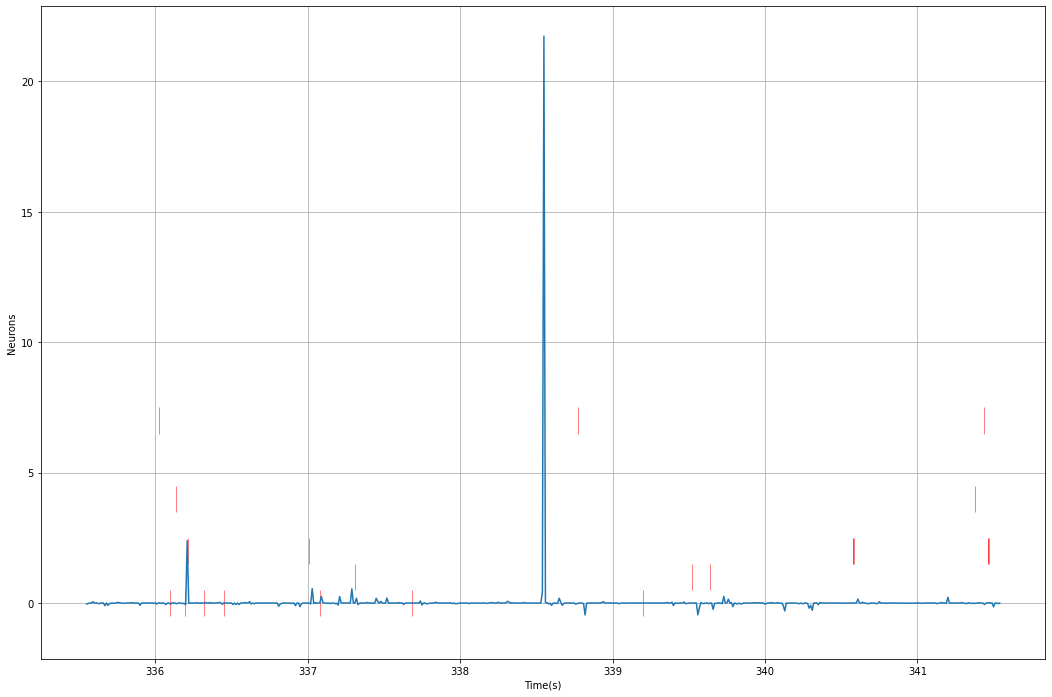

(array([ 0,  1,  5,  9, 17, 18, 26, 37, 46, 54]),)


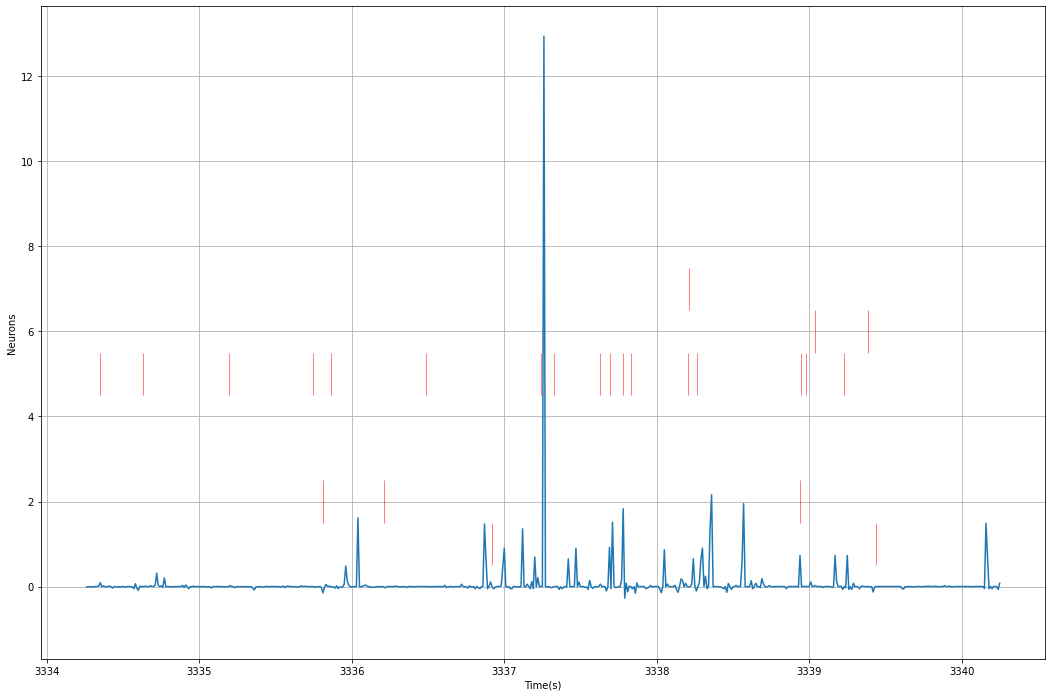

(array([14, 15, 19, 31, 32, 34, 35, 36, 39]),)


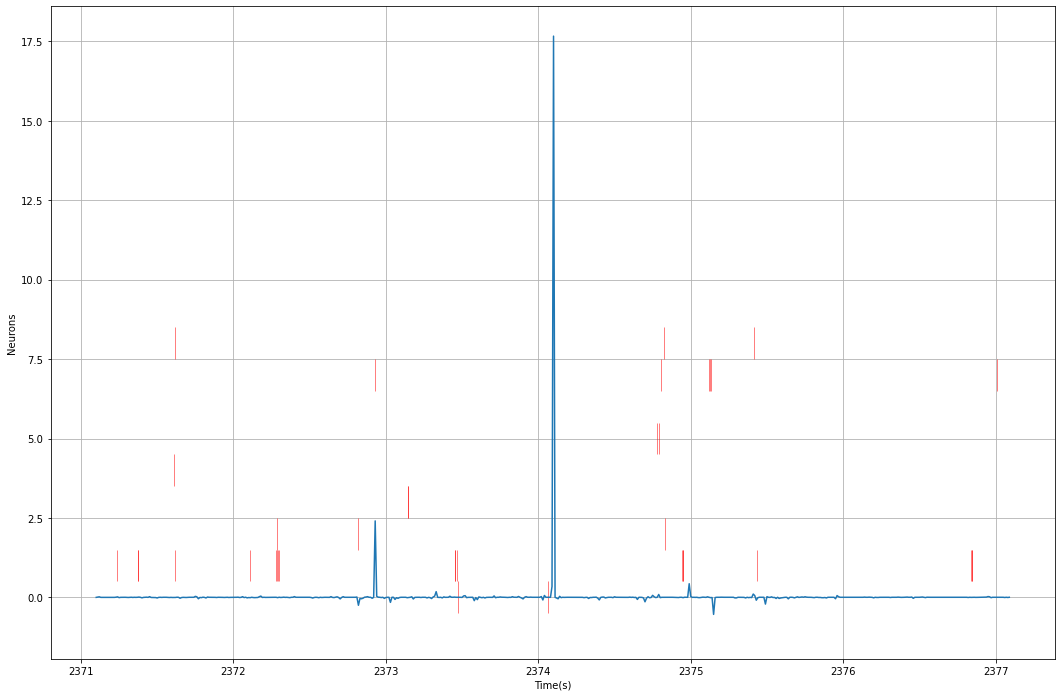

(array([22, 36, 37, 38, 40, 42, 43]),)


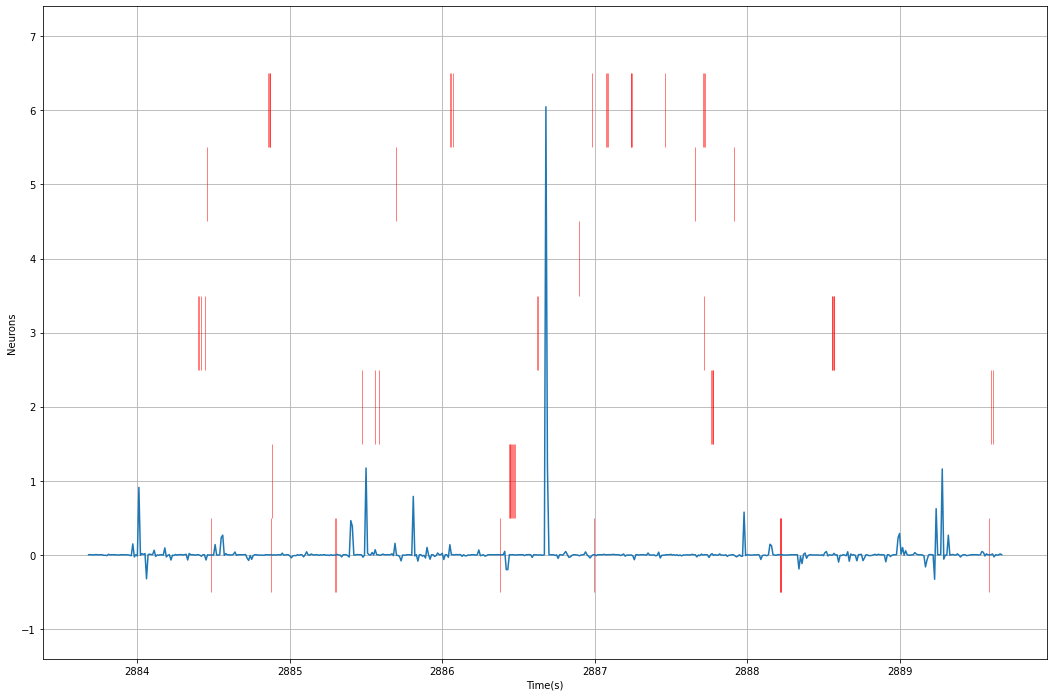

In [15]:
for i,pattern in enumerate(patterns):
    members = np.where(np.abs(pattern)>0.15)
    print(members)
    peak_ = np.argmax(assemblies_activities[i])
    prange = peak_ + np.array([-300,300])
    smps2plot = np.arange(prange[0],prange[1])
    plt.figure(figsize=(18,12))
    # bk.plot.rasterPlot(neurons[metadata.Region == 'Hpc'],np.array([prange*0.01]),col = 'black')
    bk.plot.rasterPlot(neurons[metadata.Region == 'Hpc'][members],np.array([prange*0.01]),col = 'red')
    plt.plot(smps2plot*0.01,assemblies_activities[i][smps2plot]/20)
    plt.grid()
    plt.show()

In [ ]:
bk.plot.rasterPlot()